In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

In [2]:
path = 'D:/PlantVillage/archive/plantvillage dataset/color'
train_ds, test_ds = keras.utils.image_dataset_from_directory(
    path,
    image_size=(224, 224),
    batch_size=32,
    seed=123,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [3]:
classes = train_ds.class_names

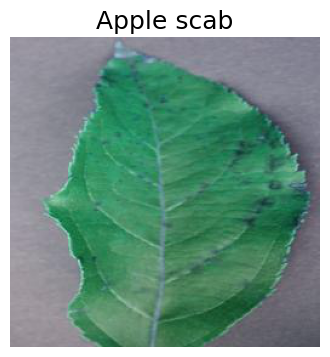

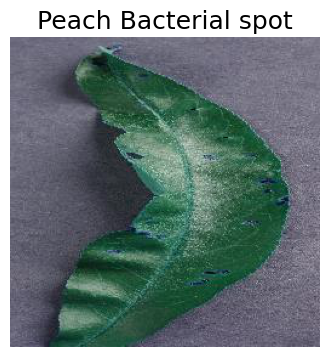

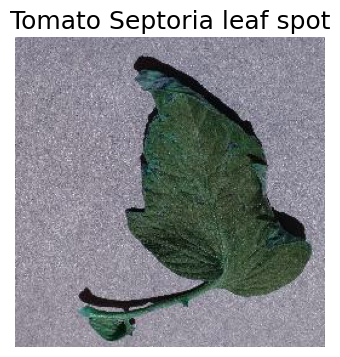

In [4]:
def show_img(path: str, title: str):
    image = cv2.imread(path)

    plt.figure(figsize=(4, 6))

    plt.imshow(image)

    plt.title(title, size=18)

    plt.axis('off')

    plt.show()


show_img("D:/PlantVillage/archive/plantvillage dataset/color/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG", 'Apple scab')
show_img("D:/PlantVillage/archive/plantvillage dataset/color/Peach___Bacterial_spot/00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG", 'Peach Bacterial spot')
show_img("D:/PlantVillage/archive/plantvillage dataset/color/Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG", 'Tomato Septoria leaf spot')

In [5]:
model = keras.Sequential([
    keras.layers.Rescaling(scale=1/255, input_shape=(224, 224, 3)),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(38, activation='sigmoid')

])

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [8]:
history = model.fit(train_ds, epochs=20)

Epoch 1/20


1358/1358 [==============================] - 877s 645ms/step - loss: 1.8397 - accuracy: 0.4851
Epoch 2/20
1358/1358 [==============================] - 871s 641ms/step - loss: 0.6638 - accuracy: 0.7923
Epoch 3/20
1358/1358 [==============================] - 867s 639ms/step - loss: 0.4060 - accuracy: 0.8682
Epoch 4/20
1358/1358 [==============================] - 896s 660ms/step - loss: 0.3077 - accuracy: 0.9008
Epoch 5/20
1358/1358 [==============================] - 882s 648ms/step - loss: 0.2490 - accuracy: 0.9183
Epoch 6/20
1358/1358 [==============================] - 909s 669ms/step - loss: 0.2101 - accuracy: 0.9317
Epoch 7/20
1358/1358 [==============================] - 871s 641ms/step - loss: 0.1796 - accuracy: 0.9400
Epoch 8/20
1358/1358 [==============================] - 1010s 744ms/step - loss: 0.1599 - accuracy: 0.9478
Epoch 9/20
1358/1358 [==============================] - 921s 678ms/step - loss: 0.1454 - accuracy: 0.9524
Epoch 10/20
1358/1358 [====================

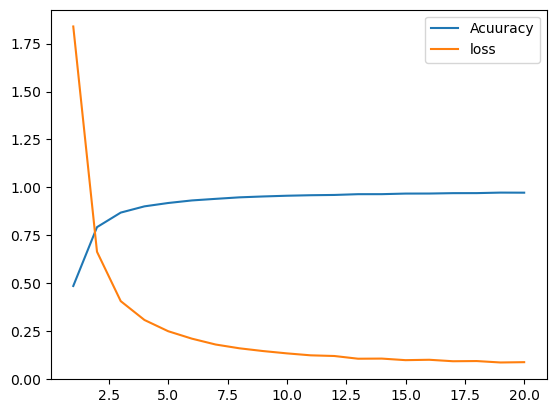

In [9]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, 21)

plt.plot(epochs, accuracy, label='Acuuracy')
plt.plot(epochs, loss, label='loss')
plt.legend()
plt.show()

In [10]:
model.evaluate(test_ds)

340/340 [==============================] - 52s 142ms/step - loss: 0.2804 - accuracy: 0.9224


[0.2803591787815094, 0.9223828315734863]

In [11]:
def img_to_pred(image):
    image = image.numpy()
    image = tf.expand_dims(image, 0)
    return image

1/1 [==============================] - 0s 51ms/step


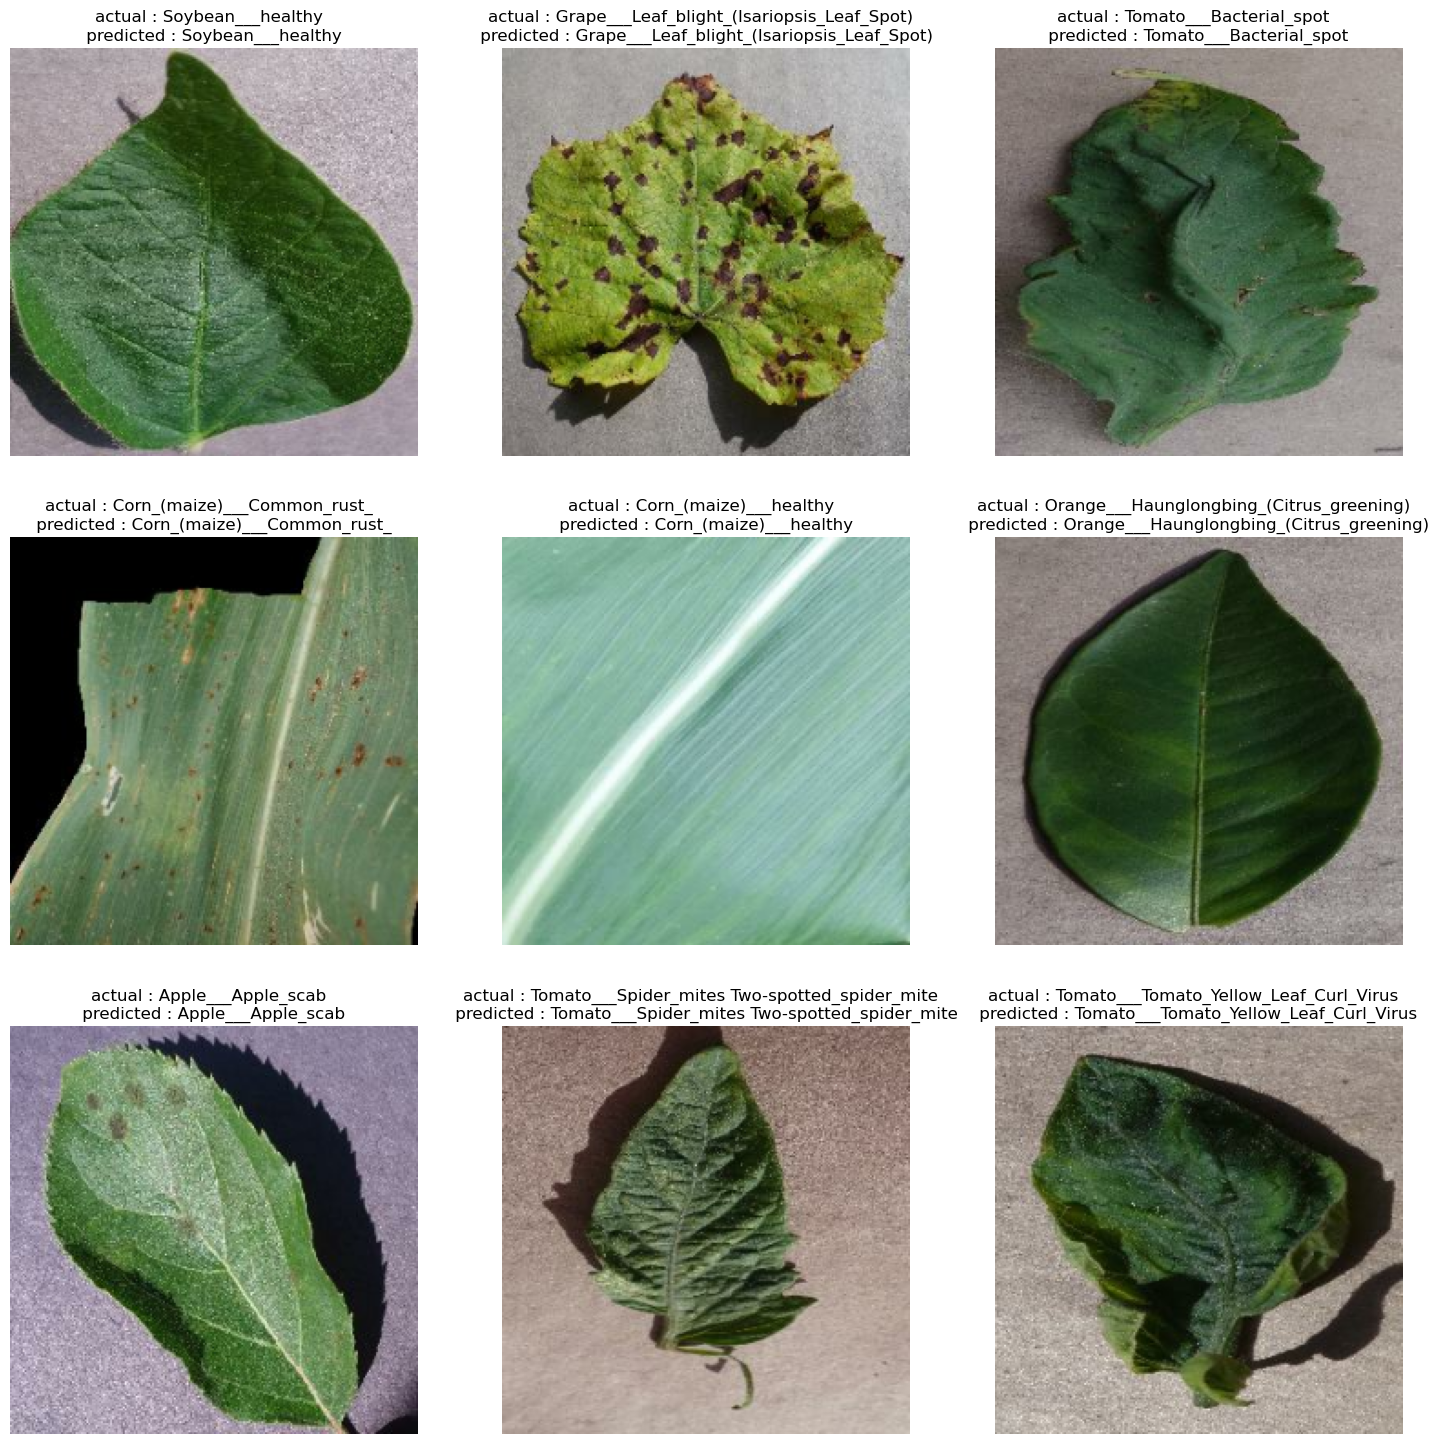

In [12]:
plt.figure(figsize=(18, 18))
for images, labels in test_ds.take(1):  # take the first patch
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        plt.imshow(images[i].numpy().astype('uint32'))
        plt.axis('off')
        actual = classes[labels[i]]
        predict = classes[np.argmax(model.predict(img_to_pred(images[i])))]
        plt.title(f"actual : {actual}  \n predicted : {predict} ")

In [13]:
model.save("Plant_Decise_Prediction_Model.keras")

1/1 [==============================] - 0s 236ms/step


Text(0.5, 1.0, 'Predicted : Tomato___Tomato_Yellow_Leaf_Curl_Virus ')

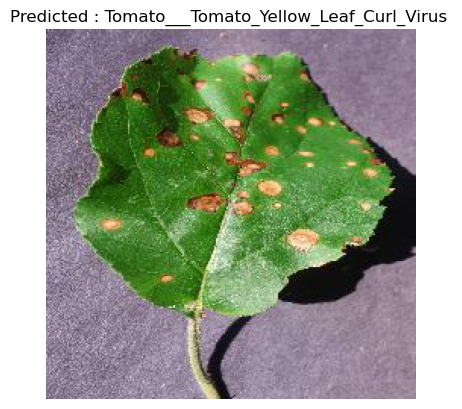

In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img

model = load_model('Plant_Decise_Prediction_Model.keras')

# image = cv2.imread("image_path")
image = keras.utils.load_img(
    "D://PlantVillage//archive//plantvillage dataset//color//Apple___Black_rot//0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S 2784.jpg",
    target_size=(244, 244),
)
plt.imshow(image)
plt.axis('off')
predict = classes[np.argmax(model.predict(img_to_pred(images[i])))]
plt.title(f"Predicted : {predict} ")